In [1]:
rm(list = ls())

In [2]:
ls()

character(0)

In [3]:
devtools::install_github('ocean-tracking-network/remora', force=TRUE, dependencies = FALSE)

✔  checking for file ‘/private/var/folders/k9/ks9pmd_17kgdvnmlzg6hdcph0000gn/T/RtmpXl15Ea/remotes2b385aef2226/ocean-tracking-network-remora-e149837/DESCRIPTION’
─  preparing ‘remora’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘remora_0.9.1.tar.gz’
   


In [4]:
devtools::install_github('ocean-tracking-network/surimi', force=TRUE, dependencies = FALSE)

✔  checking for file ‘/private/var/folders/k9/ks9pmd_17kgdvnmlzg6hdcph0000gn/T/RtmpXl15Ea/remotes2b38378e4e14/ocean-tracking-network-surimi-bdd9ecd/DESCRIPTION’
─  preparing ‘surimi’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘surimi_0.0.0.1.tar.gz’
   


In [5]:
library(devtools)
library(httr2)
library(dplyr)
library(raster)
library(readr)
library(terra)
library(tidyverse)
library(sf)
library(sp)
library(raster)
library(stars)
library(glatos)
library(utils)
library(geosphere)
library(rangeBuilder)

Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


terra 1.7.65

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks terra::extract(), raster

In [6]:
library(remora)
library(surimi)

Warning message:
“replacing previous import ‘geodist::geodist’ by ‘gmt::geodist’ when loading ‘remora’”
Registered S3 method overwritten by 'hoardr':
  method           from
  print.cache_info httr


Attaching package: ‘surimi’


The following objects are masked from ‘package:remora’:

    imos_otn_column_map, imos_to_otn_receivers, imos_to_otn_tags




In [7]:
#otn_files <- list(det = "testDataOTN/cobia/cobia_subset_export.csv")
otn_files <- list(det = "./testDataOTN/ugaaci_matched_detections_2017.csv")

In [8]:
world_raster <- raster::raster("./testDataOTN/NE2_50M_SR.tif")

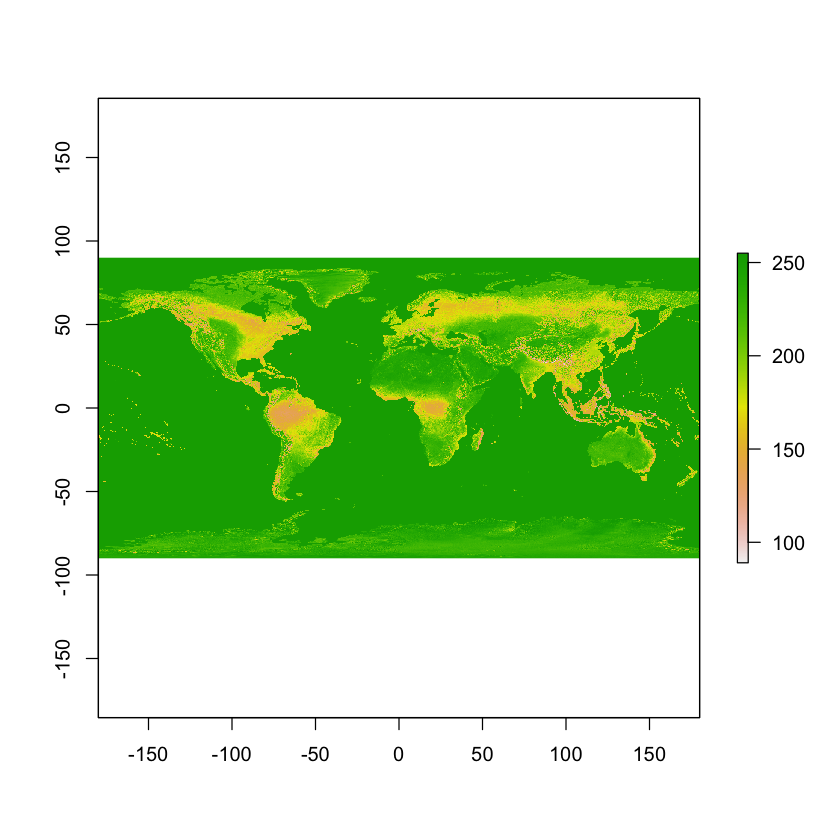

In [18]:
plot(world_raster)

In [9]:
scientific_name <- "Acipenser oxyrinchus"

In [11]:
speciesOccurrence <- getOccurrence(scientific_name)

Retrieved 5000 records of approximately 58079 (8%)
Retrieved 10000 records of approximately 58079 (17%)
Retrieved 15000 records of approximately 58079 (25%)
Retrieved 20000 records of approximately 58079 (34%)
Retrieved 25000 records of approximately 58079 (43%)
Retrieved 30000 records of approximately 58079 (51%)
Retrieved 35000 records of approximately 58079 (60%)
Retrieved 40000 records of approximately 58079 (68%)
Retrieved 45000 records of approximately 58079 (77%)
Retrieved 50000 records of approximately 58079 (86%)
Retrieved 55000 records of approximately 58079 (94%)
Retrieved 58079 records of approximately 58079 (100%)


In [12]:
speciesPolygon <- createPolygon(speciesOccurrence, fraction=1, partsCount=1, buff=100000, clipToCoast = "aquatic")

Using decimalLongitude and decimalLatitude
 as x and y coordinates, respectively.



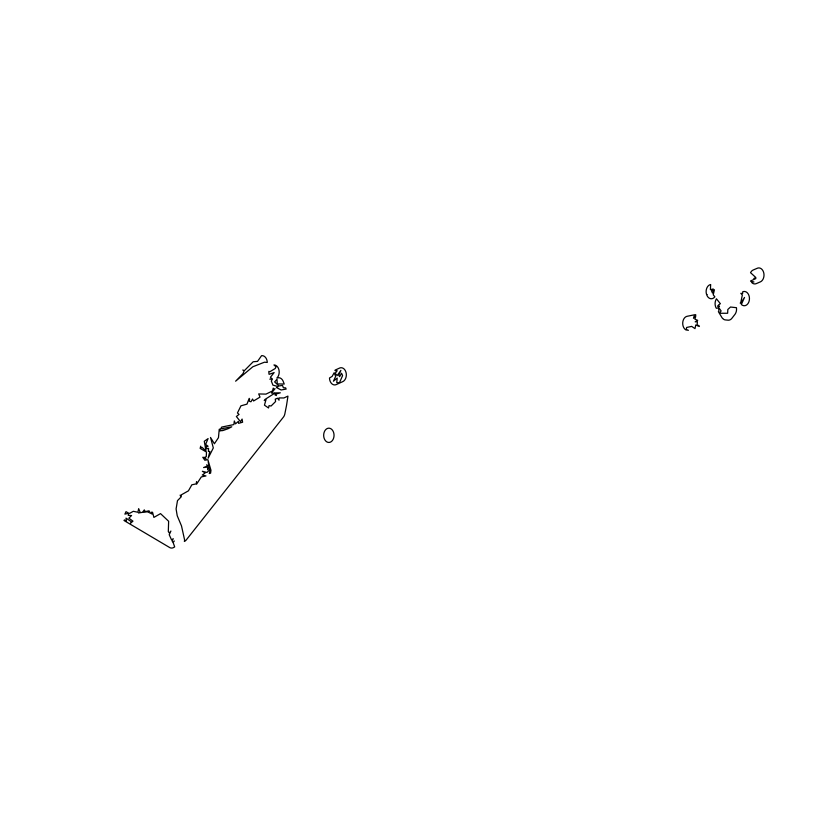

In [13]:
plot(speciesPolygon)

In [14]:
tests_vector <-  c("FDA_QC",
                   "Velocity_QC",
                   "Distance_QC",
                   "DetectionDistribution_QC",
                   "DistanceRelease_QC",
                   "ReleaseDate_QC",
                   "ReleaseLocation_QC",
                   "Detection_QC")

In [15]:
otn_test_tag_qc <- runQC(otn_files, 
                         data_format = "otn", 
                         tests_vector = tests_vector, 
                         shapefile = speciesPolygon, 
                         col_spec = NULL, 
                         fda_type = "pincock", 
                         rollup = TRUE,
                         .parallel = FALSE, .progress = TRUE)

Reading data...

Rows: 52120 Columns: 34
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (18): collectioncode, catalognumber, scientificname, commonname, detect...
dbl   (9): bottom_depth, receiver_depth, longitude, latitude, yearcollected,...
lgl   (5): sensorname, sensorraw, sensorvalue, sensorunit, notes
dttm  (1): datecollected
date  (1): datelastmodified

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Deriving receiver dataframe...

Deriving tag dataframe...

Number of releases:

75

Warning message:
“No missing IDs found in tag metadata.”
rec_meta is not null

tag meta is not null

Starting sequential QC...



file: A69-1303-45322_UGAACI-A69-1303-45322 ATS STM 2013_UGAACI-A69-1303-45322 ATS STM 2013, 1 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45327_UGAACI-A69-1303-45327 ATS ALT 2013_UGAACI-A69-1303-45327 ATS ALT 2013, 2 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45334_UGAACI-A69-1303-45334 ATS ALT 2013_UGAACI-A69-1303-45334 ATS ALT 2013, 3 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45347_UGAACI-A69-1303-45347 ATS ALT 2012_UGAACI-A69-1303-45347 ATS ALT 2012, 4 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45349_UGAACI-A69-1303-45349 ATS ALT 2012_UGAACI-A69-1303-45349 ATS ALT 2012, 5 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45351_UGAACI-A69-1303-45351 ATS ALT 2012_UGAACI-A69-1303-45351 ATS ALT 2012, 6 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45353_UGAACI-A69-1303-45353 ATS ALT 2012_UGAACI-A69-1303-45353 ATS ALT 2012, 7 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45361_UGAACI-A69-1303-45361 ATS ALT 2013_UGAACI-A69-1303-45361 ATS ALT 2013, 8 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45363_UGAACI-A69-1303-45363 ATS ALT 2013_UGAACI-A69-1303-45363 ATS ALT 2013, 9 of 75    

Starting OTN QC

A69-1303-45363_UGAACI-A69-1303-45363 ATS ALT 2013_UGAACI-A69-1303-45363 ATS ALT 2013

Conversion done.

The filter identified 0 (0%) of 58 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1303-45367_UGAACI-A69-1303-45367 ATS ALT 2013_UGAACI-A69-1303-45367 ATS ALT 2013, 10 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45368_UGAACI-A69-1303-45368 ATS ALT 2013_UGAACI-A69-1303-45368 ATS ALT 2013, 11 of 75    

Starting OTN QC

A69-1303-45368_UGAACI-A69-1303-45368 ATS ALT 2013_UGAACI-A69-1303-45368 ATS ALT 2013

Conversion done.

The filter identified 0 (0%) of 5 detections as potentially false.

The filter identified 2 (100%) of 2 detections as potentially false.

The filter identified 3 (2.13%) of 141 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 0 (0%) of 33 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1303-45369_UGAACI-A69-1303-45369 ATS ALT 2013_UGAACI-A69-1303-45369 ATS ALT 2013, 12 of 75    

Starting OTN QC

A69-1303-45369_UGAACI-A69-1303-45369 ATS ALT 2013_UGAACI-A69-1303-45369 ATS ALT 2013

Conversion done.

The filter identified 3 (6.12%) of 49 detections as potentially false.

The filter identified 2 (14.29%) of 14 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1303-45370_UGAACI-A69-1303-45370 ATS ALT 2012_UGAACI-A69-1303-45370 ATS ALT 2012, 13 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45371_UGAACI-A69-1303-45371 ATS ALT 2012_UGAACI-A69-1303-45371 ATS ALT 2012, 14 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45372_UGAACI-A69-1303-45372 ATS ALT 2013_UGAACI-A69-1303-45372 ATS ALT 2013, 15 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45373_UGAACI-A69-1303-45373 ATS ALT 2012_UGAACI-A69-1303-45373 ATS ALT 2012, 16 of 75    

Starting OTN QC

A69-1303-45373_UGAACI-A69-1303-45373 ATS ALT 2012_UGAACI-A69-1303-45373 ATS ALT 2012

Conversion done.

The filter identified 0 (0%) of 14 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1303-45374_UGAACI-A69-1303-45374 ATS ALT 2012_UGAACI-A69-1303-45374 ATS ALT 2012, 17 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45375_UGAACI-A69-1303-45375 ATS ALT 2013_UGAACI-A69-1303-45375 ATS ALT 2013, 18 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45376_UGAACI-A69-1303-45376 ATS ALT 2012_UGAACI-A69-1303-45376 ATS ALT 2012, 19 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45377_UGAACI-A69-1303-45377 ATS ALT 2012_UGAACI-A69-1303-45377 ATS ALT 2012, 20 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45378_UGAACI-A69-1303-45378 ATS ALT 2012_UGAACI-A69-1303-45378 ATS ALT 2012, 21 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45379_UGAACI-A69-1303-45379 ATS ALT 2012_UGAACI-A69-1303-45379 ATS ALT 2012, 22 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45380_UGAACI-A69-1303-45380 ATS ALT 2012_UGAACI-A69-1303-45380 ATS ALT 2012, 23 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45381_UGAACI-A69-1303-45381 ATS ALT 2013_UGAACI-A69-1303-45381 ATS ALT 2013, 24 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45382_UGAACI-A69-1303-45382 ATS ALT 2013_UGAACI-A69-1303-45382 ATS ALT 2013, 25 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45383_UGAACI-A69-1303-45383 ATS ALT 2013_UGAACI-A69-1303-45383 ATS ALT 2013, 26 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45384_UGAACI-A69-1303-45384 ATS ALT 2013_UGAACI-A69-1303-45384 ATS ALT 2013, 27 of 75    

Starting OTN QC

A69-1303-45384_UGAACI-A69-1303-45384 ATS ALT 2013_UGAACI-A69-1303-45384 ATS ALT 2013

Conversion done.

The filter identified 0 (0%) of 30 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 12 (0.47%) of 2537 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1303-45386_UGAACI-A69-1303-45386 ATS ALT 2013_UGAACI-A69-1303-45386 ATS ALT 2013, 28 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45387_UGAACI-A69-1303-45387 ATS ALT 2013_UGAACI-A69-1303-45387 ATS ALT 2013, 29 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1303-45388_UGAACI-A69-1303-45388 ATS ALT 2013_UGAACI-A69-1303-45388 ATS ALT 2013, 30 of 75    

Starting OTN QC

A69-1303-45388_UGAACI-A69-1303-45388 ATS ALT 2013_UGAACI-A69-1303-45388 ATS ALT 2013

Conversion done.

The filter identified 1 (33.33%) of 3 detections as potentially false.

The filter identified 1 (16.67%) of 6 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 0 (0%) of 2 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1303-45390_UGAACI-A69-1303-45390 ATS ALT 2013_UGAACI-A69-1303-45390 ATS ALT 2013, 31 of 75    

Starting OTN QC

A69-1303-45390_UGAACI-A69-1303-45390 ATS ALT 2013_UGAACI-A69-1303-45390 ATS ALT 2013

Conversion done.

The filter identified 2 (10.53%) of 19 detections as potentially false.

The filter identified 2 (50%) of 4 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1303-9747_UGAACI-A69-1303-9747 ATS ALT 2013_UGAACI-A69-1303-9747 ATS ALT 2013, 32 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-33374_UGAACI-A69-1601-33374 ATS OGE 2015_UGAACI-A69-1601-33374 ATS OGE 2015, 33 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-33378_UGAACI-A69-1601-33378 ATS SAT 2015_UGAACI-A69-1601-33378 ATS SAT 2015, 34 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-33396_UGAACI-A69-1601-33396 ATS ALT 2015_UGAACI-A69-1601-33396 ATS ALT 2015, 35 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-33408_UGAACI-A69-1601-33408 ATS STJ 2015_UGAACI-A69-1601-33408 ATS STJ 2015, 36 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43308_UGAACI-A69-1601-43308 ATS SAT 2016_UGAACI-A69-1601-43308 ATS SAT 2016, 37 of 75    

Starting OTN QC

A69-1601-43308_UGAACI-A69-1601-43308 ATS SAT 2016_UGAACI-A69-1601-43308 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 65 (0.44%) of 14713 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43309_UGAACI-A69-1601-43309 ATS ALT 2016_UGAACI-A69-1601-43309 ATS ALT 2016, 38 of 75    

Starting OTN QC

A69-1601-43309_UGAACI-A69-1601-43309 ATS ALT 2016_UGAACI-A69-1601-43309 ATS ALT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 21 (0.25%) of 8392 detections as potentially false.

The filter identified 3 (100%) of 3 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43310_UGAACI-A69-1601-43310 ATS SAT 2016_UGAACI-A69-1601-43310 ATS SAT 2016, 39 of 75    

Starting OTN QC

A69-1601-43310_UGAACI-A69-1601-43310 ATS SAT 2016_UGAACI-A69-1601-43310 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 27 (9.93%) of 272 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43311_UGAACI-A69-1601-43311 ATS ALT 2016_UGAACI-A69-1601-43311 ATS ALT 2016, 40 of 75    

Starting OTN QC

A69-1601-43311_UGAACI-A69-1601-43311 ATS ALT 2016_UGAACI-A69-1601-43311 ATS ALT 2016

Conversion done.

The filter identified 1 (33.33%) of 3 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 0 (0%) of 19 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43312_UGAACI-A69-1601-43312 ATS ALT 2016_UGAACI-A69-1601-43312 ATS ALT 2016, 41 of 75    

Starting OTN QC

A69-1601-43312_UGAACI-A69-1601-43312 ATS ALT 2016_UGAACI-A69-1601-43312 ATS ALT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 2 (25%) of 8 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43313_UGAACI-A69-1601-43313 ATS ALT 2016_UGAACI-A69-1601-43313 ATS ALT 2016, 42 of 75    

Starting OTN QC

A69-1601-43313_UGAACI-A69-1601-43313 ATS ALT 2016_UGAACI-A69-1601-43313 ATS ALT 2016

Conversion done.

The filter identified 1 (5.56%) of 18 detections as potentially false.

The filter identified 4 (100%) of 4 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 7 (6.42%) of 109 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43314_UGAACI-A69-1601-43314 ATS ALT 2016_UGAACI-A69-1601-43314 ATS ALT 2016, 43 of 75    

Starting OTN QC

A69-1601-43314_UGAACI-A69-1601-43314 ATS ALT 2016_UGAACI-A69-1601-43314 ATS ALT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 0 (0%) of 10 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 8 (3.69%) of 217 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43315_UGAACI-A69-1601-43315 ATS ALT 2016_UGAACI-A69-1601-43315 ATS ALT 2016, 44 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43316_UGAACI-A69-1601-43316 ATS SAT 2016_UGAACI-A69-1601-43316 ATS SAT 2016, 45 of 75    

Starting OTN QC

A69-1601-43316_UGAACI-A69-1601-43316 ATS SAT 2016_UGAACI-A69-1601-43316 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (3.7%) of 27 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43317_UGAACI-A69-1601-43317 ATS ALT 2016_UGAACI-A69-1601-43317 ATS ALT 2016, 46 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43318_UGAACI-A69-1601-43318 ATS ALT 2016_UGAACI-A69-1601-43318 ATS ALT 2016, 47 of 75    

Starting OTN QC

A69-1601-43318_UGAACI-A69-1601-43318 ATS ALT 2016_UGAACI-A69-1601-43318 ATS ALT 2016

Conversion done.

The filter identified 0 (0%) of 3 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 15 (9.93%) of 151 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43319_UGAACI-A69-1601-43319 ATS ALT 2016_UGAACI-A69-1601-43319 ATS ALT 2016, 48 of 75    

Starting OTN QC

A69-1601-43319_UGAACI-A69-1601-43319 ATS ALT 2016_UGAACI-A69-1601-43319 ATS ALT 2016

Conversion done.

The filter identified 3 (37.5%) of 8 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 49 (13.61%) of 360 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43320_UGAACI-A69-1601-43320 ATS OGE 2016_UGAACI-A69-1601-43320 ATS OGE 2016, 49 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43321_UGAACI-A69-1601-43321 ATS SAT 2016_UGAACI-A69-1601-43321 ATS SAT 2016, 50 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43322_UGAACI-A69-1601-43322 ATS OGE 2016_UGAACI-A69-1601-43322 ATS OGE 2016, 51 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43323_UGAACI-A69-1601-43323 ATS OGE 2016_UGAACI-A69-1601-43323 ATS OGE 2016, 52 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43324_UGAACI-A69-1601-43324 ATS SAT 2016_UGAACI-A69-1601-43324 ATS SAT 2016, 53 of 75    

Starting OTN QC

A69-1601-43324_UGAACI-A69-1601-43324 ATS SAT 2016_UGAACI-A69-1601-43324 ATS SAT 2016

Conversion done.

The filter identified 4 (66.67%) of 6 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 7 (23.33%) of 30 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43325_UGAACI-A69-1601-43325 ATS SAT 2016_UGAACI-A69-1601-43325 ATS SAT 2016, 54 of 75    

Starting OTN QC

A69-1601-43325_UGAACI-A69-1601-43325 ATS SAT 2016_UGAACI-A69-1601-43325 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 11 (12.5%) of 88 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43326_UGAACI-A69-1601-43326 ATS SAT 2016_UGAACI-A69-1601-43326 ATS SAT 2016, 55 of 75    

Starting OTN QC

A69-1601-43326_UGAACI-A69-1601-43326 ATS SAT 2016_UGAACI-A69-1601-43326 ATS SAT 2016

Conversion done.

The filter identified 1 (20%) of 5 detections as potentially false.

The filter identified 0 (0%) of 3 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 3 (12%) of 25 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43327_UGAACI-A69-1601-43327 ATS OGE 2016_UGAACI-A69-1601-43327 ATS OGE 2016, 56 of 75    

Starting OTN QC

A69-1601-43327_UGAACI-A69-1601-43327 ATS OGE 2016_UGAACI-A69-1601-43327 ATS OGE 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 33 (0.79%) of 4159 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43328_UGAACI-A69-1601-43328 ATS OGE 2016_UGAACI-A69-1601-43328 ATS OGE 2016, 57 of 75    

Starting OTN QC

A69-1601-43328_UGAACI-A69-1601-43328 ATS OGE 2016_UGAACI-A69-1601-43328 ATS OGE 2016

Conversion done.

The filter identified 1 (2.38%) of 42 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 5 (1.81%) of 276 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43329_UGAACI-A69-1601-43329 ATS OGE 2016_UGAACI-A69-1601-43329 ATS OGE 2016, 58 of 75    

Starting OTN QC

A69-1601-43329_UGAACI-A69-1601-43329 ATS OGE 2016_UGAACI-A69-1601-43329 ATS OGE 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 47 (0.48%) of 9876 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43330_UGAACI-A69-1601-43330 ATS OGE 2016_UGAACI-A69-1601-43330 ATS OGE 2016, 59 of 75    

Starting OTN QC

A69-1601-43330_UGAACI-A69-1601-43330 ATS OGE 2016_UGAACI-A69-1601-43330 ATS OGE 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 16 (2.13%) of 750 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43331_UGAACI-A69-1601-43331 ATS OGE 2016_UGAACI-A69-1601-43331 ATS OGE 2016, 60 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43332_UGAACI-A69-1601-43332 ATS SAT 2016_UGAACI-A69-1601-43332 ATS SAT 2016, 61 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43333_UGAACI-A69-1601-43333 ATS SAT 2016_UGAACI-A69-1601-43333 ATS SAT 2016, 62 of 75    

Starting OTN QC

A69-1601-43333_UGAACI-A69-1601-43333 ATS SAT 2016_UGAACI-A69-1601-43333 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 21 (6.03%) of 348 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43334_UGAACI-A69-1601-43334 ATS SAT 2016_UGAACI-A69-1601-43334 ATS SAT 2016, 63 of 75    

Starting OTN QC

A69-1601-43334_UGAACI-A69-1601-43334 ATS SAT 2016_UGAACI-A69-1601-43334 ATS SAT 2016

Conversion done.

The filter identified 0 (0%) of 6 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 26 (5.24%) of 496 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43336_UGAACI-A69-1601-43336 ATS OGE 2016_UGAACI-A69-1601-43336 ATS OGE 2016, 64 of 75    

Starting OTN QC

A69-1601-43336_UGAACI-A69-1601-43336 ATS OGE 2016_UGAACI-A69-1601-43336 ATS OGE 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 7 (5.22%) of 134 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43337_UGAACI-A69-1601-43337 ATS OGE 2016_UGAACI-A69-1601-43337 ATS OGE 2016, 65 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43338_UGAACI-A69-1601-43338 ATS OGE 2016_UGAACI-A69-1601-43338 ATS OGE 2016, 66 of 75    

Starting OTN QC

A69-1601-43338_UGAACI-A69-1601-43338 ATS OGE 2016_UGAACI-A69-1601-43338 ATS OGE 2016

Conversion done.

The filter identified 1 (14.29%) of 7 detections as potentially false.

The filter identified 0 (0%) of 5 detections as potentially false.

The filter identified 2 (100%) of 2 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 21 (3.28%) of 641 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43339_UGAACI-A69-1601-43339 ATS OGE 2016_UGAACI-A69-1601-43339 ATS OGE 2016, 67 of 75    

Starting OTN QC

A69-1601-43339_UGAACI-A69-1601-43339 ATS OGE 2016_UGAACI-A69-1601-43339 ATS OGE 2016

Conversion done.

The filter identified 6 (14.63%) of 41 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 4 (0.83%) of 483 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43340_UGAACI-A69-1601-43340 ATS ALT 2016_UGAACI-A69-1601-43340 ATS ALT 2016, 68 of 75    

Starting OTN QC

A69-1601-43340_UGAACI-A69-1601-43340 ATS ALT 2016_UGAACI-A69-1601-43340 ATS ALT 2016

Conversion done.

The filter identified 2 (100%) of 2 detections as potentially false.

The filter identified 31 (1.73%) of 1797 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (20%) of 5 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43341_UGAACI-A69-1601-43341 ATS ALT 2016_UGAACI-A69-1601-43341 ATS ALT 2016, 69 of 75    

Starting OTN QC

A69-1601-43341_UGAACI-A69-1601-43341 ATS ALT 2016_UGAACI-A69-1601-43341 ATS ALT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 4 (7.14%) of 56 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43342_UGAACI-A69-1601-43342 ATS ALT 2016_UGAACI-A69-1601-43342 ATS ALT 2016, 70 of 75    

Starting OTN QC

Dataframe must have more than one row for QC.



file: A69-1601-43343_UGAACI-A69-1601-43343 ATS ALT 2016_UGAACI-A69-1601-43343 ATS ALT 2016, 71 of 75    

Starting OTN QC

A69-1601-43343_UGAACI-A69-1601-43343 ATS ALT 2016_UGAACI-A69-1601-43343 ATS ALT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 7 (30.43%) of 23 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43344_UGAACI-A69-1601-43344 ATS SAT 2016_UGAACI-A69-1601-43344 ATS SAT 2016, 72 of 75    

Starting OTN QC

A69-1601-43344_UGAACI-A69-1601-43344 ATS SAT 2016_UGAACI-A69-1601-43344 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 14 (13.86%) of 101 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43345_UGAACI-A69-1601-43345 ATS ALT 2016_UGAACI-A69-1601-43345 ATS ALT 2016, 73 of 75    

Starting OTN QC

A69-1601-43345_UGAACI-A69-1601-43345 ATS ALT 2016_UGAACI-A69-1601-43345 ATS ALT 2016

Conversion done.

The filter identified 4 (57.14%) of 7 detections as potentially false.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 66 (1.53%) of 4301 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43346_UGAACI-A69-1601-43346 ATS SAT 2016_UGAACI-A69-1601-43346 ATS SAT 2016, 74 of 75    

Starting OTN QC

A69-1601-43346_UGAACI-A69-1601-43346 ATS SAT 2016_UGAACI-A69-1601-43346 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 35 (3.26%) of 1074 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster
file: A69-1601-43347_UGAACI-A69-1601-43347 ATS SAT 2016_UGAACI-A69-1601-43347 ATS SAT 2016, 75 of 75    

Starting OTN QC

A69-1601-43347_UGAACI-A69-1601-43347 ATS SAT 2016_UGAACI-A69-1601-43347 ATS SAT 2016

Conversion done.

The filter identified 1 (100%) of 1 detections as potentially false.

The filter identified 1 (5.56%) of 18 detections as potentially false.

Warning message:
“This function is deprecated and will be removed in the next version”
Making transition layer...

Done.



[1] "Made transition layer"
Error : [crop] extents do not overlap
Error in shortest_dist2(position, x$installation_name, rast = world_raster,  : 
  detection locations outside extent of land raster



Warning message:
“36 tag detection file(s) could not be QC'd”

 Please see QC_logfile.txt for potential data, metadata issues and/or QC error messages


Writing all QC output files...


Writing `QCsummary.csv` file...


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `detection_datetime = ymd_hms(detection_datetime)`.
Caused by warning:
!  68 failed to parse.”


In [16]:
otn_test_tag_qc

filename,QC
<chr>,"<list<tibble[,68]>>"
A69-1303-45322_UGAACI-A69-1303-45322 ATS STM 2013_UGAACI-A69-1303-45322 ATS STM 2013,"A69-1303-45322 , UGAACI-A69-1303-45322 ATS STM 2013, UGAACI-A69-1303-45322 ATS STM 2013, UGAACI , Atlantic sturgeon , Acipenser oxyrinchus oxyrinchus , NA , 151803 , NA , 1373655840 , -81.63329 , 30.73026 , UGAACI , UGAACI , St. Marys River, GA , release , release , UGAACI-St. Marys River, GA-release, NA , NA , NA , NA , NA , NA , NA , UGAACI , NA , NA , NA , 2013 , 7 , 12 , 15898 , NA , NA , NA , NA , NA , NA , NA , NA , NA , 30.73026 , -81.63329 , 1373655840 , NA , NA , NA , 2013 , 7 , 12 , -81.63329 , 30.73026 , NA , NA , NA , NA , NA , NA , St. Marys River, GA , NA , NA , NA , NA , NA , NA , NA , NA"
A69-1303-45327_UGAACI-A69-1303-45327 ATS ALT 2013_UGAACI-A69-1303-45327 ATS ALT 2013,"A69-1303-45327 , UGAACI-A69-1303-45327 ATS ALT 2013, UGAACI-A69-1303-45327 ATS ALT 2013, UGAACI , Atlantic sturgeon , Acipenser oxyrinchus oxyrinchus , NA , 151803 , NA , 1370304000 , -81.15574 , 32.2399 , UGAACI , UGAACI , Altamaha River, GA , release , release , UGAACI-Altamaha River, GA-release , NA , NA , NA , NA , NA , NA , NA , UGAACI , NA , NA , NA , 2013 , 6 , 4 , 15860 , NA , NA , NA , NA , NA , NA , NA , NA , NA , 32.2399 , -81.15574 , 1370304000 , NA , NA , NA , 2013 , 6 , 4 , -81.15574 , 32.2399 , NA , NA , NA , NA , NA , NA , Altamaha River, GA , NA , NA , NA , NA , NA , NA , NA , NA"
A69-1303-45334_UGAACI-A69-1303-45334 ATS ALT 2013_UGAACI-A69-1303-45334 ATS ALT 2013,"A69-1303-45334 , UGAACI-A69-1303-45334 ATS ALT 2013, UGAACI-A69-1303-45334 ATS ALT 2013, UGAACI , Atlantic sturgeon , Acipenser oxyrinchus oxyrinchus , NA , 151803 , NA , 1369008000 , -81.15406 , 32.15585 , UGAACI , UGAACI , Altamaha River, GA , release , release , UGAACI-Altamaha River, GA-release , NA , NA , NA , NA , NA , NA , NA , UGAACI , NA , NA , NA , 2013 , 5 , 20 , 15845 , NA , NA , NA , NA , NA , NA , NA , NA , NA , 32.15585 , -81.15406 , 1369008000 , NA , NA , NA , 2013 , 5 , 20 , -81.15406 , 32.15585 , NA , NA , NA , NA , NA , NA , Altamaha River, GA , NA , NA , NA , NA , NA , NA , NA , NA"
A69-1303-45347_UGAACI-A69-1303-45347 ATS ALT 2012_UGAACI-A69-1303-45347 ATS ALT 2012,"A69-1303-45347 , UGAACI-A69-1303-45347 ATS ALT 2012, UGAACI-A69-1303-45347 ATS ALT 2012, UGAACI , Atlantic sturgeon , Acipenser oxyrinchus oxyrinchus , NA , 151803 , NA , 1339718400 , -81.30949 , 31.32025 , UGAACI , UGAACI , Altamaha River, GA , release , release , UGAACI-Altamaha River, GA-release , NA , NA , NA , NA , NA , NA , NA , UGAACI , NA , NA , NA , 2012 , 6 , 15 , 15506 , NA , NA , NA , NA , NA , NA , NA , NA , NA , 31.32025 , -81.30949 , 1339718400 , NA , NA , NA , 2012 , 6 , 15 , -81.30949 , 31.32025 , NA , NA , NA , NA , NA , NA , Altamaha River, GA , NA , NA , NA , NA , NA , NA , NA , NA"
A69-1303-45349_UGAACI-A69-1303-45349 ATS ALT 2012_UGAACI-A69-1303-45349 ATS ALT 2012,"A69-1303-45349 , UGAACI-A69-1303-45349 ATS ALT 2012, UGAACI-A69-1303-45349 ATS ALT 2012, UGAACI , Atlantic sturgeon , Acipenser oxyrinchus oxyrinchus , NA , 151803 , NA , 1336953600 , -81.30949 , 31.32025 , UGAACI , UGAACI , Altamaha River, GA , release , release , UGAACI-Altamaha River, GA-release , NA , NA , NA , NA , NA , NA , NA , UGAACI , NA , NA , NA , 2012 , 5 , 14 , 15474 , NA , NA , NA , NA , NA , NA , NA , NA , NA , 31.32025 , -81.30949 , 1336953600 , NA , NA , NA , 2012 , 5 , 14 , -81.30949 , 31.32025 , NA , NA , NA , NA , NA , NA , Altamaha River, GA , NA , NA , NA , NA , NA , NA , NA , NA"
A69-1303-45351_UGAACI-A69-1303-45351 ATS ALT 2012_UGAACI-A69-1303-45351 ATS ALT 2012,"A69-1303-45351 , UGAACI-A69-1303-45351 ATS ALT 2012, UGAACI-A69-1303-45351 ATS ALT 2012, UGAACI , Atlantic sturgeon , Acipenser oxyrinchus oxyrinchus , NA , 151803 , NA , 1339718400 , -81.30949 , 31.32025 , UGAACI , UGAACI , Altamaha River, GA , release , release , UGAACI-Altamaha River, GA-release , NA , NA , NA , NA , NA , NA , NA , UGAACI , NA , NA , NA , 2012 , 6 , 15 , 15506 , NA , NA , NA

In [ ]:
write.csv(otn_test_tag_qc, "notebook_output_test.csv")

In [ ]:
writeQC(otn_test_tag_qc, aggregate = TRUE)